In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler



In [2]:
data_df =pd.read_csv('cleaned_data.csv')
data_df = data_df.drop(['Unnamed: 0'], axis=1)
data_df.head(2)

,Name,Announcement,Burial,Burial_Day,Burial_Week,Gender,Color,Size,Word_Count,No_of_Children,Significant_Children,Significant_Relatives,Fundraising,Announce_to_Burial,No_of_Relatives,County_Burial,Married
0,Eng. Paul Chemweno,2017-11-08 00:00:00,2017-11-17,0,0,1,1,55.18,179,7.0,0.0,0.0,1,9,35,37,1
1,Edith Kiende Kiogora,2017-11-08 00:00:00,2017-11-11,2,1,0,1,83.60,293,4.0,0.0,7.0,1,3,8,35,1


In [3]:
dropped=data_df[data_df['Announce_to_Burial']>90]
dropped_=dropped.index
data_df=data_df.drop(dropped_)

dropped=data_df[data_df['Announce_to_Burial']<0]
dropped_=dropped.index
data_df=data_df.drop(dropped_) 

In [4]:
data_df[data_df['Word_Count']==2014]
data_df=data_df.drop([7])

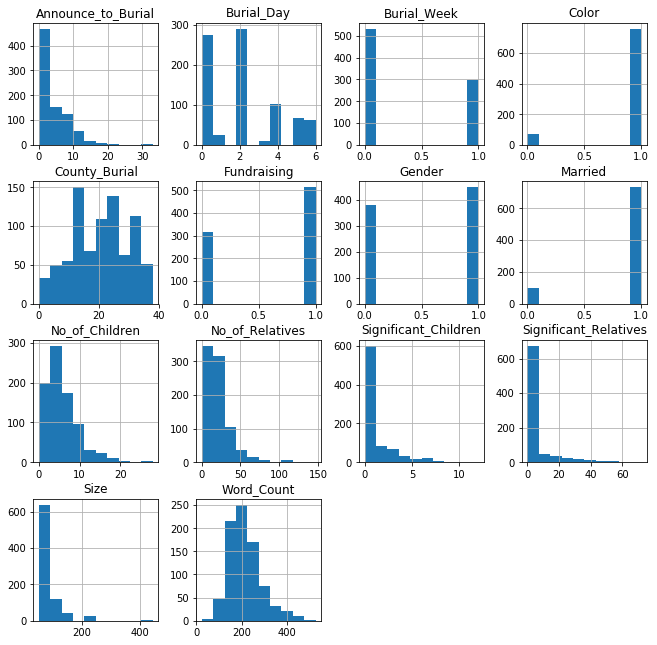

In [5]:

data_df[data_df.dtypes[(data_df.dtypes=="float64")|(data_df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
plt.show()


### Train and Test data

In [6]:
y = data_df['Fundraising']
X = data_df.drop(['Fundraising'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(664, 16) (664,)
(166, 16) (166,)


In [7]:

#store name to be used later before dropping it
data_dfName = X_test.Name

#drop name and md5 since they are not helpful for modelling
X_train=X_train.drop(['Announcement','Burial','Name'], axis=1)

X_test=X_test.drop(['Announcement','Burial','Name'], axis=1)

In [54]:
def conf_matrix(y_test, y_pred):
    """
    plot the confusion matrix to identify the correctly and wrongly predicted
    
    y_test: ground truth 
    y_pred: model prediction
    """
    cm_2 = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_2,annot=True,fmt="d")
    plt.xlabel('Precited')
    plt.ylabel('Actual')
    plt.show()

### Modeling
Since the problem we are trying to solve is a classification problem. i am going to use bunch of classification model to get the best prediction possible. I will use the following models and describe them along the way to give a better perspective.

Linear regression <br>
AdaBoost Classifier <br>
Random forest <br>
Decision Tree <br>

In [8]:
# Initializing and Fitting a k-NN model

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
# Checking the performance of our model on the testing data set

accuracy_score(y_test,knn.predict(X_test))

0.6024096385542169

In [9]:

min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.fit_transform(X_test)

In [10]:
# Initializing and Fitting a k-NN model

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,y_train)
# Checking the performance of our model on the testing data set

accuracy_score(y_test,knn.predict(X_test_minmax))

0.6144578313253012

In [11]:
X_test.columns

Index(['Burial_Day', 'Burial_Week', 'Gender', 'Color', 'Size', 'Word_Count',
       'No_of_Children', 'Significant_Children', 'Significant_Relatives',
       'Announce_to_Burial', 'No_of_Relatives', 'County_Burial', 'Married'],
      dtype='object')

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Burial_Day', 'Burial_Week', 'Gender', 'Color','Married']
for col in columns:
   # creating an exhaustive list of all possible categorical values
   data=X_train[[col]].append(X_test[[col]])
   enc.fit(data)
   # Fitting One Hot Encoding on train data
   temp = enc.transform(X_train[[col]])
   # Changing the encoded features into a data frame with new column names
   temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
        .value_counts().index])
   # In side by side concatenation index values should be same
   # Setting the index values similar to the X_train data frame
   temp=temp.set_index(X_train.index.values)
   # adding the new One Hot Encoded varibales to the train data frame
   X_train_1=pd.concat([X_train_1,temp],axis=1)
   # fitting One Hot Encoding on test data
   temp = enc.transform(X_test[[col]])
   # changing it into data frame and adding column names
   temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
        .value_counts().index])
   # Setting the index for proper concatenation
   temp=temp.set_index(X_test.index.values)
   # adding the new One Hot Encoded varibales to test data frame
   X_test_1=pd.concat([X_test_1,temp],axis=1)

In [13]:

X_test_1.drop(columns, axis=1,inplace =True)

In [14]:
X_train_1.drop(columns, axis=1,inplace =True)

In [15]:
# Initializing and Fitting a k-NN model

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_1,y_train)
# Checking the performance of our model on the testing data set

accuracy_score(y_test,knn.predict(X_test_1))

0.6144578313253012

In [19]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_1, y_train)
adaboost_pred = adaboost.predict(X_test_1)
adaboost_accy = round(accuracy_score(adaboost_pred, y_test), 3)
print(adaboost_accy) 

0.735


In [20]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train_1, y_train)

rfe_pred = rfe.predict(X_test_1)
rfe_accy = round(accuracy_score(rfe_pred, y_test), 3)
print(rfe_accy)

0.765


In [39]:
f1_score(y_test, rfe_pred)

0.8115942028985508

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, rfe_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.7166666666666667

In [53]:
sensitivity= tp/(tp+fn)
sensitivity

0.7924528301886793

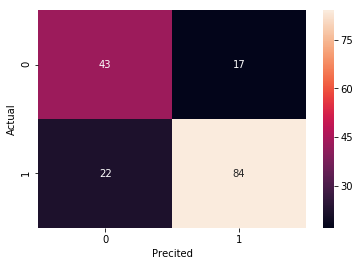

In [57]:
conf_matrix(y_test, rfe_pred)

In [26]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train_1, y_train)
dectree_pred = dectree.predict(X_test_1)

dectree_accy = round(accuracy_score(dectree_pred, y_test), 3)
print(dectree_accy)

0.687


In [38]:
f1_score(y_test, dectree_pred)

0.7592592592592593

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, dectree_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.5333333333333333

In [51]:
sensitivity= tp/(tp+fn)
sensitivity

0.7735849056603774

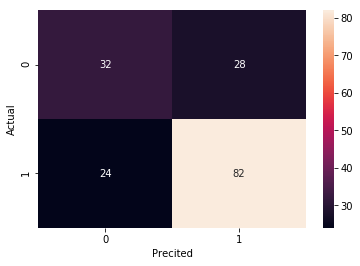

In [56]:
conf_matrix(y_test, dectree_pred)

In [35]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=8,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train_1, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train_1.columns[rfecv.support_])
rfecv_pred = rfecv.predict(X_test_1)
rfecv_accy = round(accuracy_score(rfecv_pred, y_test), 3)
print(rfecv_accy)

Optimal number of features : 8
Best features : Index(['Size', 'Word_Count', 'No_of_Children', 'Significant_Children',
       'Significant_Relatives', 'Announce_to_Burial', 'No_of_Relatives',
       'County_Burial'],
      dtype='object')
0.765


In [37]:
f1_score(y_test, rfecv_pred)

0.8115942028985508

In [47]:

tn, fp, fn, tp = confusion_matrix(y_test, rfecv_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.7166666666666667

In [49]:
sensitivity= tp/(tp+fn)
sensitivity

0.7924528301886793

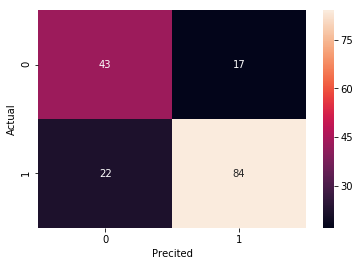

In [55]:
conf_matrix(y_test, rfecv_pred)